In [1]:
import torch
from torch import nn
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from torchmetrics import Accuracy

In [23]:
torch.__version__

'2.4.0+cpu'

# create mulit-class data

In [2]:
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_STATE = 42

In [3]:
X, y = make_blobs(n_samples=1000,n_features=NUM_FEATURES,centers=NUM_CLASSES,cluster_std=1.5,random_state=RANDOM_STATE)

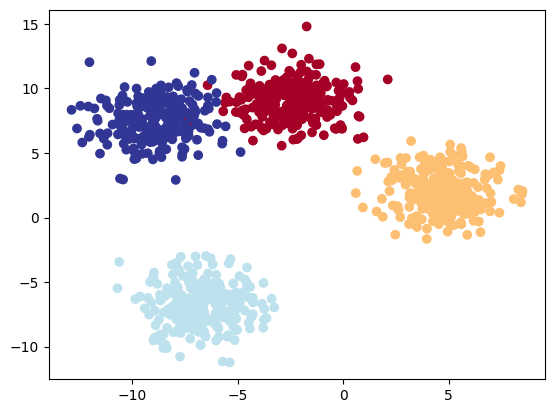

In [4]:
plt.scatter(X[:,0], X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [5]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.LongTensor)

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [7]:
X_train[:5], X_test[:5],y_train[:5],y_test[:5]

(tensor([[-9.5353,  7.6253],
         [-8.0679,  6.5245],
         [-7.7741,  6.6703],
         [ 0.3201,  9.2762],
         [-7.0121, -3.0105]]),
 tensor([[ 4.6675,  4.4878],
         [-7.9969,  6.8803],
         [-6.2801, -7.8571],
         [ 3.6833,  1.1767],
         [-0.1404, 10.1654]]),
 tensor([3, 3, 3, 0, 2]),
 tensor([1, 3, 2, 1, 0]))

In [8]:
X_train.dtype, X_test.dtype,y_train.dtype,y_test.dtype

(torch.float32, torch.float32, torch.int64, torch.int64)

In [9]:
type(X_train)

torch.Tensor

In [10]:
device = "cuda" if torch.cuda.is_available() else "cpu"

# define the model class

In [11]:
class BlobModel(nn.Module):
    def __init__(self,input_features,output_features,hidden_units=8):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features,out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,out_features=output_features)
        )
    def forward(self,x):
        return self.linear_layer_stack(x)

In [12]:
model = BlobModel(input_features=2,output_features=4,hidden_units=8).to(device)

In [13]:
model.state_dict()

OrderedDict([('linear_layer_stack.0.weight',
              tensor([[ 0.4282,  0.1842],
                      [-0.4540, -0.2457],
                      [-0.6586,  0.4340],
                      [-0.1090,  0.5456],
                      [-0.6092, -0.5319],
                      [-0.0344, -0.2922],
                      [ 0.4581,  0.6639],
                      [ 0.1748,  0.1410]])),
             ('linear_layer_stack.0.bias',
              tensor([ 0.4491, -0.0409, -0.0750,  0.5519, -0.3285,  0.0757,  0.5830, -0.1480])),
             ('linear_layer_stack.2.weight',
              tensor([[ 0.1643,  0.1559, -0.2345, -0.1312,  0.2134,  0.0479,  0.0830,  0.1961],
                      [ 0.1025, -0.1491,  0.1565, -0.2887,  0.2987,  0.1181,  0.2314, -0.0669],
                      [-0.0107, -0.3529, -0.1498,  0.2053, -0.0864,  0.2380,  0.1322,  0.2421],
                      [-0.0172, -0.0536, -0.1357,  0.1421,  0.1006,  0.2232, -0.3416,  0.3317],
                      [-0.3014,  0.1886, -0.117

In [14]:
# loss fn and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(),lr=0.1)

In [15]:
if torch.inference_mode():
    y_logits = model(X_test.to(device))
    y_pred_probs = torch.softmax(y_logits,dim=1)
    y_pred = torch.argmax(y_pred_probs,dim=1)

In [16]:
y_pred

tensor([1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2,
        2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1,
        1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2,
        2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2,
        2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1,
        2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1,
        1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2,
        1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2,
        1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2,
        1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2,
        2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2,

In [17]:
def accuracy_fn(y_true,y_pred):
    correct = torch.eq(y_true,y_pred).sum().item()
    acc = correct*100.0/len(y_pred)
    return acc

In [29]:
acc_f = Accuracy(task="multiclass", num_classes=4)

In [18]:
epochs = 100

In [30]:
torch.manual_seed(42)
for epoch in range(epochs):
    model.train()
    y_logits = model(X_train).squeeze()
    y_pred = torch.softmax(y_logits,dim=1).argmax(dim=1)
    # calculate acc/ loss
    loss = loss_fn(y_logits,y_train)
    # acc = accuracy_fn(y_true=y_train,y_pred=y_pred)  
    acc = acc_f(y_pred,y_train)
    #optimizer
    optimizer.zero_grad()
    # loss_backward
    loss.backward()
    #optimizer step
    optimizer.step()

    #testing
    model.eval()
    with torch.inference_mode():
        #forward pass
        test_logits = model(X_test).squeeze()
        test_pred = torch.softmax(test_logits,dim=1).argmax(dim=1)
        # calculate test loss /acc
        test_loss = loss_fn(test_logits,y_test)
        # test_acc = accuracy_fn(y_true=y_test,y_pred=test_pred)
        test_acc = acc_f(test_pred,y_test)
    if epoch % 10 == 0:
        print(f"Epoch {epoch} loss {loss:.5f} acc {acc:.2f} test loss {test_loss:.5f} test acc {test_acc:.2f}")        

Epoch 0 loss 0.03258 acc 0.99 test loss 0.02090 test acc 0.99
Epoch 10 loss 0.03151 acc 0.99 test loss 0.01984 test acc 0.99
Epoch 20 loss 0.03064 acc 0.99 test loss 0.01899 test acc 0.99
Epoch 30 loss 0.02993 acc 0.99 test loss 0.01828 test acc 0.99
Epoch 40 loss 0.02934 acc 0.99 test loss 0.01769 test acc 0.99
Epoch 50 loss 0.02884 acc 0.99 test loss 0.01718 test acc 0.99
Epoch 60 loss 0.02841 acc 0.99 test loss 0.01675 test acc 0.99
Epoch 70 loss 0.02804 acc 0.99 test loss 0.01636 test acc 0.99
Epoch 80 loss 0.02772 acc 0.99 test loss 0.01602 test acc 0.99
Epoch 90 loss 0.02744 acc 0.99 test loss 0.01571 test acc 0.99


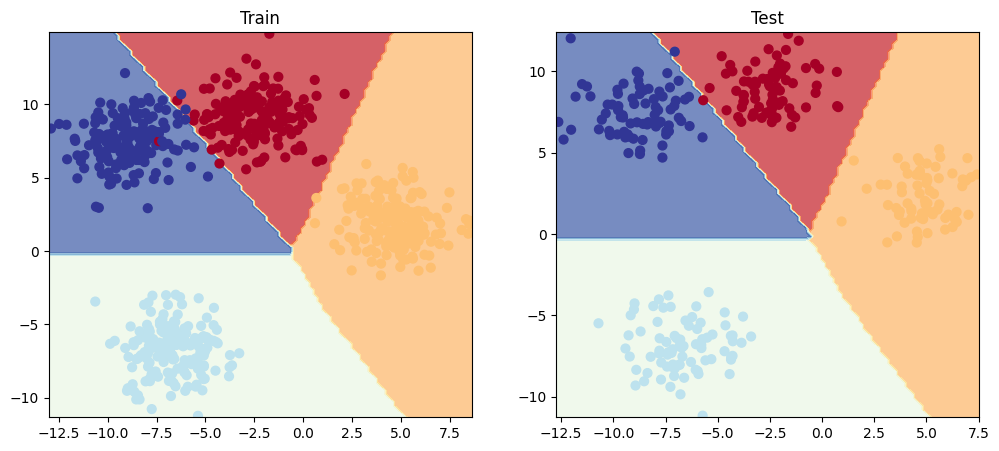

In [20]:
# Visualize the decision boundary
from helper_functions import plot_decision_boundary
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model=model, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model=model, X=X_test, y=y_test)